### All packages 

In [115]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout

import pandas as pd
import numpy as np
import re,string

import _collections
from _collections import defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Importing and exploring data

In [2]:

#%cd /Users/Pia/Desktop/NLP/LDA

/Users/Pia/Desktop/NLP/LDA


In [3]:
#Load data 

AllData = pd.read_csv(r"dataTest.csv")

In [4]:
#Checking the data 
print(AllData.shape)

print(AllData[0:10])

print(AllData[422530:422540])


(422540, 2)
                                                text  label
0    #ThingsDoneByMistake kissing auntie in the lips      1
1  RT @mc_derpin: #TheOlderWeGet the more pessimi...      1
2  RT @dmataconis: Ready To Feel Like A Failure? ...      1
3    Amen! #blacklivesmatter https://t.co/wGffaOqgzl      1
4  RT @NahBabyNah: Twitchy: Chuck Todd caught out...      1
5  RT @mcicero10: #BernieSanders #Trump people sh...      1
6  RT @ItsJustJaynie: @HillaryClinton The undecid...      1
7                           @TodayCleveland 'no way'      1
8  @NickTomaWBRE Hi, Nick! We're holding a "Miner...      1
9  What. Is. A. Resolution #My4WordNewYearsResolu...      1
                                                     text  label
422530   Election Trump  visit black church  Detroit B...      0
422531       Election Trump  visit black church  Detroit       0
422532        Election Trump  visit black church Detroit       0
422533  HillaryClinton says #Russia meddling  election...      0
422

In [7]:
#As visivble above, some tweets are repeated many times. This is very likely bots or trolls, and they should be removed

#Create a collum with amount of characters 
AllData['tweet_length']  = AllData['text'].str.len()

#Number of words in tweet
AllData['tweet_word_count'] = AllData['text'].apply(lambda x: len(str(x).split(" ")))

#find tweets that are more than 30 charectars long 
dflong = AllData[AllData.tweet_length > 30]

print("Amount of twets that are more than 30 charecters long:",len(dflong))

 
duplicate_tweet = AllData[AllData.duplicated(['text'],keep=False)]

print("Amount of dublicate tweets:", len(duplicate_tweet))

#how many unique ones?
print("Amount of unique dublicate tweets:", len(duplicate_tweet.text.unique()))

#and how many times do they appear?
duplicate_tweet['count'] = duplicate_tweet.groupby('text')['text'].transform('count')

#Remove the dublicats
dflong.drop_duplicates(subset ="text", keep = False, inplace = True) 

dfshort = AllData[AllData.tweet_length <= 30]
AllData = pd.concat([dfshort, dflong], ignore_index=True)

print("Shape of data:", AllData.shape)

print(AllData[0:10])
print(AllData[299737:299747])


Amount of twets that are more than 30 charecters long: 294474
Amount of dublicate tweets: 2421
Amount of unique dublicate tweets: 551


/Users/Pia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Shape of data: (301452, 4)
                             text  label  tweet_length  tweet_word_count
0        @TodayCleveland 'no way'      1            24                 3
1  #IfICouldntLie I'd become mute      1            30                 4
2  RT @JoyAnnReid: @es_snipes :-)      1            30                 4
3   https://t.co/57h8vd3QSm ouch!      1            29                 2
4      Track and field of dreams"      1            26                 5
5             Wish you were…beer!      1            19                 3
6            @MarkJWO Impossible!      1            20                 2
7                     Black Magic      1            11                 2
8    @Jenn_Abrams Right decision!      1            28                 3
9                @Humoritarian 😂😂      1            16                 2
                                                     text  label  \
299737            election will  reverse mining decline        0   
299738   seems year unexpected  be

/Users/Pia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
#AllDataCleaned=AllData

AllDataCleaned=AllData

print("Shape of data:", AllDataCleaned.shape)
#print(AllData.shape)



AllDataCleanedTroll=AllDataCleaned.loc[AllDataCleaned['label'] == 1]
AllDataCleanedNotTroll=AllDataCleaned.loc[AllDataCleaned['label'] == 0]

print("Shape of Troll data", (AllDataCleanedTroll.shape))
print("Shape of not Troll data",(AllDataCleanedNotTroll.shape))




Shape of data: (301452, 4)
Shape of Troll data (150474, 4)
Shape of not Troll data (150978, 4)


### Regex data clearning 


In [12]:
AllDataCleaned=AllData
AllDataCleaned['text'] = AllData['text'].str.replace('http\S+|www.\S+', '', case=False)


tweets = list(AllData.text)
tweets_T= list(AllDataCleanedTroll.text)
tweets_NT= list(AllDataCleanedNotTroll.text)

process_twt = list(filter(None, [re.sub(r'\b\w{1,3}\b','', str(x)) for x in tweets]))
process_twt_T = list(filter(None, [re.sub(r'\b\w{1,3}\b','', str(x)) for x in tweets_T]))
process_twt_NT = list(filter(None, [re.sub(r'\b\w{1,3}\b','', str(x)) for x in tweets_NT]))


In [13]:
# RE removing numbers

AllDataCleaned['text'] = AllData['text'].str.replace(r'\d+','', case=False)
print (AllDataCleaned[100:110])

process_twt = list(filter(None, [re.sub(r'\d+','', str(x)) for x in process_twt]))
process_twt_T = list(filter(None, [re.sub(r'\d+','', str(x)) for x in process_twt_T]))
process_twt_NT = list(filter(None, [re.sub(r'\d+','', str(x)) for x in process_twt_NT]))


                               text  label  tweet_length  tweet_word_count
100     breaking news: i don't care      1            27                 5
101                 @HillaryClinton      1            15                 1
102        #TwitterCanBeABit Bitchy      1            24                 2
103       An IOU   #LastMinuteGifts      1            29                 5
104         Too late baby, too late      1            23                 5
105     'Why are you always alone?'      1            27                 5
106                           🔴!!!       1            28                 2
107         "Winnipeg, Lose Or Draw      1            23                 4
108  No, I just can’t get over you.      1            30                 7
109                        awesome       1            30                 2


In [14]:
# RE removing punctuation

AllDataCleaned['text'] = AllData['text'].str.replace(r'[\.\,\'\"\!\?\:\;\-\_\=\(\)\|\*\@\&\$\"\/\%\+]+','', case=False)
print (AllDataCleaned[100:110])

process_twt = list(filter(None, [re.sub(r'[\.\,\'\"\!\?\:\;\-\_\=\(\)\|\*\@\&\$\"\/\%\+]+','', str(x)) for x in process_twt]))
process_twt_T = list(filter(None, [re.sub(r'[\.\,\'\"\!\?\:\;\-\_\=\(\)\|\*\@\&\$\"\/\%\+]+','', str(x)) for x in process_twt_T]))
process_twt_NT = list(filter(None, [re.sub(r'[\.\,\'\"\!\?\:\;\-\_\=\(\)\|\*\@\&\$\"\/\%\+]+','', str(x)) for x in process_twt_NT]))


                             text  label  tweet_length  tweet_word_count
100     breaking news i dont care      1            27                 5
101                HillaryClinton      1            15                 1
102      #TwitterCanBeABit Bitchy      1            24                 2
103     An IOU   #LastMinuteGifts      1            29                 5
104        Too late baby too late      1            23                 5
105      Why are you always alone      1            27                 5
106                            🔴       1            28                 2
107         Winnipeg Lose Or Draw      1            23                 4
108  No I just can’t get over you      1            30                 7
109                      awesome       1            30                 2


In [15]:
# RE removing non-ASCII characters

AllDataCleaned['text'] = AllData['text'].str.replace(r'[^\x00-\x7F]+','', case=False)
print (AllDataCleaned[100:110])

process_twt = list(filter(None, [re.sub(r'[^\x00-\x7F]+','', str(x)) for x in process_twt]))
process_twt_T = list(filter(None, [re.sub(r'[^\x00-\x7F]+','', str(x)) for x in process_twt_T]))
process_twt_NT = list(filter(None, [re.sub(r'[^\x00-\x7F]+','', str(x)) for x in process_twt_NT]))


                            text  label  tweet_length  tweet_word_count
100    breaking news i dont care      1            27                 5
101               HillaryClinton      1            15                 1
102     #TwitterCanBeABit Bitchy      1            24                 2
103    An IOU   #LastMinuteGifts      1            29                 5
104       Too late baby too late      1            23                 5
105     Why are you always alone      1            27                 5
106                                   1            28                 2
107        Winnipeg Lose Or Draw      1            23                 4
108  No I just cant get over you      1            30                 7
109                     awesome       1            30                 2


In [16]:
# RE removing too long character chains (e.g. "gooooo"="go")
AllDataCleaned['text'] = AllData['text'].str.replace(r'(.)\1{2,}',r'\1', case=False)
print (AllDataCleaned[100:110])

process_twt = list(filter(None, [re.sub(r'(.)\1{2,}',r'\1', str(x)) for x in process_twt]))
process_twt_T = list(filter(None, [re.sub(r'(.)\1{2,}',r'\1', str(x)) for x in process_twt_T]))
process_twt_NT = list(filter(None, [re.sub(r'(.)\1{2,}',r'\1', str(x)) for x in process_twt_NT]))


                            text  label  tweet_length  tweet_word_count
100    breaking news i dont care      1            27                 5
101               HillaryClinton      1            15                 1
102     #TwitterCanBeABit Bitchy      1            24                 2
103      An IOU #LastMinuteGifts      1            29                 5
104       Too late baby too late      1            23                 5
105     Why are you always alone      1            27                 5
106                                   1            28                 2
107        Winnipeg Lose Or Draw      1            23                 4
108  No I just cant get over you      1            30                 7
109                     awesome       1            30                 2


In [17]:
# RE removeing RT for retweet recognition since dublicates are removed

AllDataCleaned['text'] = AllData['text'].str.replace(r'(RT)' ,'', case=False)
print (AllDataCleaned[100:110])

process_twt = list(filter(None, [re.sub(r'(RT)' ,r'\1', str(x)) for x in process_twt]))
process_twt_T = list(filter(None, [re.sub(r'(RT)' ,r'\1', str(x)) for x in process_twt_T]))
process_twt_NT = list(filter(None, [re.sub(r'(RT)' ,r'\1', str(x)) for x in process_twt_NT]))


                            text  label  tweet_length  tweet_word_count
100    breaking news i dont care      1            27                 5
101               HillaryClinton      1            15                 1
102     #TwitterCanBeABit Bitchy      1            24                 2
103      An IOU #LastMinuteGifts      1            29                 5
104       Too late baby too late      1            23                 5
105     Why are you always alone      1            27                 5
106                                   1            28                 2
107        Winnipeg Lose Or Draw      1            23                 4
108  No I just cant get over you      1            30                 7
109                     awesome       1            30                 2


In [18]:
#Remove row if there is an empty cell 
AllDataCleaned.dropna(axis=0, how='any', inplace=False)

#Save data as csv so I dont have to run all this again later. 
AllDataCleaned.to_csv(r'/Users/Pia/Desktop/NLP/LDA/AllDataCleaned.csv')

print(AllDataCleaned.shape)


(301452, 4)


### Tokenize and remove capital letters

In [19]:
# Prepare the lemmatizer and the stop list
lmtzr = WordNetLemmatizer()
stoplist = stopwords.words('english')


#Tokenize
process_twt = [
    [word for word in document.lower().split()]
    for document in process_twt]

process_twt_T = [
    [word for word in document.lower().split()]
    for document in process_twt_T]

process_twt_NT = [
    [word for word in document.lower().split()]
    for document in process_twt_NT]

In [20]:
# Calculate the frequency of each word, save it in a dictionary of format {"word":n}
frequency = defaultdict(int)
for text in process_twt:
    for token in text:
        frequency[token] += 1



In [21]:
# Remove words that appear only once, as well as words in our stop list
process_twt = [
    [token for token in text if frequency[token] > 1
     and token not in stoplist]
    for text in process_twt
]




In [22]:
# Lemmantize the tokens
cleaned_tweets = [
     [lmtzr.lemmatize(word) for word in document if word not in stoplist]
    for document in process_twt
 ]


cleaned_Trolls = [
     [lmtzr.lemmatize(word) for word in document if word not in stoplist]
    for document in process_twt_T
 ]

cleaned_NotTrolls = [
     [lmtzr.lemmatize(word) for word in document if word not in stoplist]
    for document in process_twt_NT
 ]

In [23]:
#TweetsList=pd.DataFrame(cleaned_tweets, columns=["text"])
#text=pd.DataFrame(cleaned_tweets, columns=["text"])

#c_tweets=list(cleaned_tweets)


#text=pd.DataFrame(c_tweets, columns=["text"])

#CleanedData=AllData['cleantext'] = cleaned_tweets

print(AllData.shape)
print("Contains empty rows", AllDataCleaned.shape)
print("Number of tweets", len(process_twt))





(301452, 4)
Contains empty rows (301452, 4)
Number of tweets 301281


### Visual differences

tweet_length    79.747076
dtype: float64


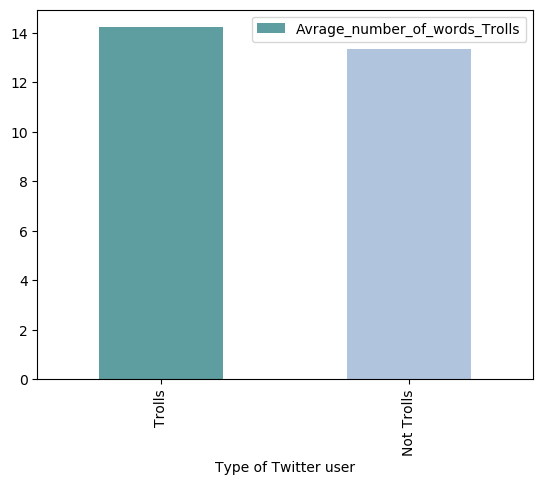

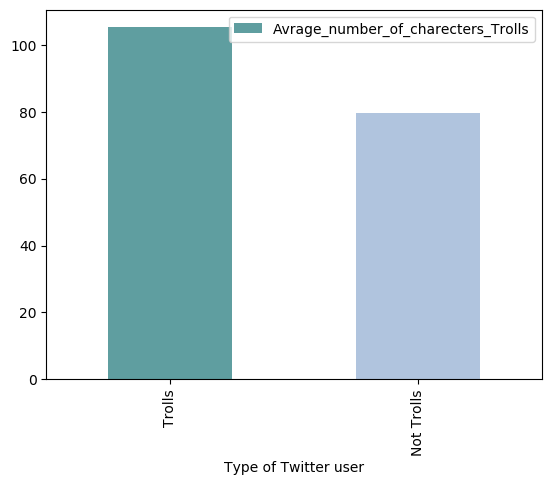

In [58]:
Avrage_number_of_words_Trolls=AllDataCleanedTroll[['tweet_word_count']].mean(axis=0)

Avrage_number_of_words_Not_Trolls=AllDataCleanedNotTroll[['tweet_word_count']].mean(axis=0)


Avrage_number_of_charecters_Trolls=AllDataCleanedTroll[['tweet_length']].mean(axis=0)

Avrage_number_of_charecters_Not_Trolls=AllDataCleanedNotTroll[['tweet_length']].mean(axis=0)
print(Avrage_number_of_charecters_Not_Trolls)


VisualWords = {'Type of Twitter user':['Trolls', 'Not Trolls'], 'Avrage_number_of_words_Trolls':[float(Avrage_number_of_words_Trolls), float(Avrage_number_of_words_Not_Trolls)]} 

VisualCharacters = {'Type of Twitter user':['Trolls', 'Not Trolls'], 'Avrage_number_of_charecters_Trolls':[float(Avrage_number_of_charecters_Trolls), float(Avrage_number_of_charecters_Not_Trolls)]} 

VisualWords = pd.DataFrame(VisualWords)

VisualCharacters = pd.DataFrame(VisualCharacters)
#AllDataCleanedTroll
#AllDataCleanedNotTroll


VisualWords.plot(x ="Type of Twitter user", y='Avrage_number_of_words_Trolls', kind = 'bar', color=['CadetBlue', 'LightSteelBlue', 'PowderBlue', 'SteelBlue'])

VisualCharacters.plot(x ="Type of Twitter user", y='Avrage_number_of_charecters_Trolls', kind = 'bar', color=['CadetBlue', 'LightSteelBlue', 'PowderBlue', 'SteelBlue'])


In [62]:
print(Avrage_number_of_words_Not_Trolls)

tweet_word_count    13.339255
dtype: float64


### Prepare data for models

In [25]:
#Split into training and testing sets. x is text and y is labels. 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(AllDataCleaned['text'], AllData['label'])


In [26]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

#All this has to be strings
AllDataCleaned['text'] = AllDataCleaned['text'].astype(str)
train_x = train_x.astype(str)
valid_x = valid_x.astype(str)
train_y = train_y.astype(str)
valid_y = valid_y.astype(str)



In [27]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(AllDataCleaned['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [28]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(AllDataCleaned['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [29]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(AllDataCleaned['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

### Models 

In [74]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)




def train_model1(classifier, feature_vector_train, label, feature_vector_valid, 
                is_neural_net=False, epochs=1):
    # fit the training dataset on the classifier
    if is_neural_net:
      classifier.fit(feature_vector_train, label, epochs=epochs)
    else:
      classifier.fit(feature_vector_train, label)   
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    
    if is_neural_net:
      predictions = [int(round(p[0])) for p in predictions]
      #predictions = predictions.argmax(axis=-1)

    print("predictions", predictions[:20])
    print("valid_y", valid_y[:20])
    
    return metrics.accuracy_score(predictions, valid_y)


#### Linear Classifier

In [52]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)


LR, WordLevel TF-IDF:  0.9910964266284517


In [43]:

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print( "LR, N-Gram Vectors: ", accuracy)


LR, N-Gram Vectors:  0.9049533590754083


In [44]:

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

LR, CharLevel Vectors:  0.992755065483062


##### Naive Bayes

In [321]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)


NB, WordLevel TF-IDF:  0.9688175895333254


In [322]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

NB, N-Gram Vectors:  0.8405981715165267


In [323]:
# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, CharLevel Vectors:  0.9662831893634808


##### SVM

In [205]:
# SVM on word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("S VM, tfifg wordlevel Vectors: ", accuracy)

/Users/Pia/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM, tfifg wordlevel Vectors:  0.8960917862644936


In [206]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

/Users/Pia/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM, N-Gram Vectors:  0.5100948674288495


In [ ]:
# SVM on Character Level Level TF IDF Vectors  ###!!! No patience for that. Takes too long to run !!!###
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("SVM, CharLevel Vectors: ", accuracy) 

/Users/Pia/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Neural Network 

In [136]:
# Neural network on word Level TF IDF Vectors
def make_model():
    model = Sequential()
    model.add(Dense(units=100, activation='relu', input_dim=xtrain_tfidf_ngram.shape[1]))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dropout(rate=0.30))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

model = make_model()
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(xtrain_tfidf, train_y, epochs=10, verbose=2, batch_size=400, validation_data=(xvalid_tfidf, valid_y))


Train on 226089 samples, validate on 75363 samples
Epoch 1/10
 - 33s - loss: 0.5501 - acc: 0.7657 - val_loss: 0.4453 - val_acc: 0.9883
Epoch 2/10
 - 27s - loss: 0.4517 - acc: 0.8441 - val_loss: 0.3622 - val_acc: 0.9912
Epoch 3/10
 - 29s - loss: 0.4145 - acc: 0.8452 - val_loss: 0.3082 - val_acc: 0.9920
Epoch 4/10
 - 29s - loss: 0.3927 - acc: 0.8470 - val_loss: 0.2697 - val_acc: 0.9922
Epoch 5/10
 - 29s - loss: 0.3819 - acc: 0.8465 - val_loss: 0.2431 - val_acc: 0.9918
Epoch 6/10
 - 30s - loss: 0.3739 - acc: 0.8472 - val_loss: 0.2226 - val_acc: 0.9921
Epoch 7/10
 - 28s - loss: 0.3667 - acc: 0.8492 - val_loss: 0.2074 - val_acc: 0.9915
Epoch 8/10
 - 30s - loss: 0.3654 - acc: 0.8481 - val_loss: 0.1962 - val_acc: 0.9916
Epoch 9/10
 - 30s - loss: 0.3615 - acc: 0.8493 - val_loss: 0.1868 - val_acc: 0.9916
Epoch 10/10
 - 28s - loss: 0.3623 - acc: 0.8479 - val_loss: 0.1808 - val_acc: 0.9917


Text(0.5, 1.0, 'Loss')

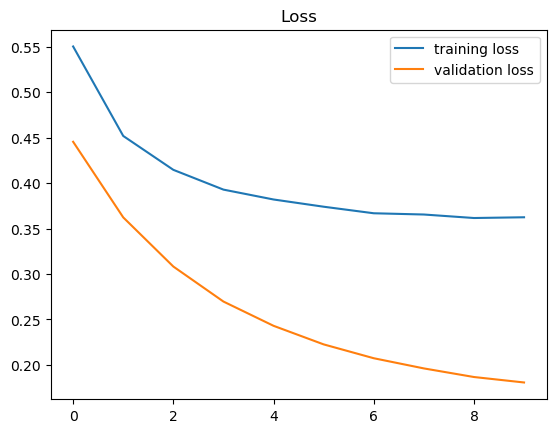

In [137]:
#Loss vizualized to check for overfitting 
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['training loss', 'validation loss']);
plt.title('Loss')



Text(0.5, 1.0, 'Accuracy')

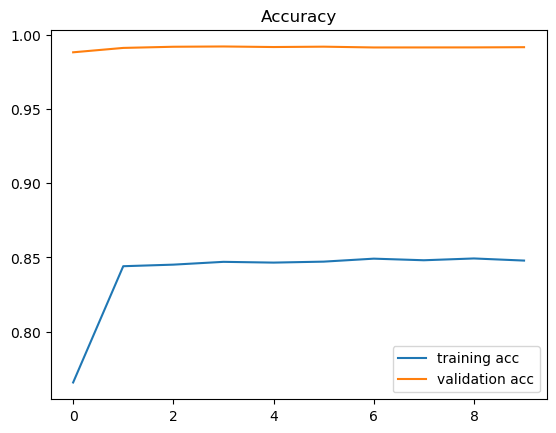

In [138]:
#Loss vizualized to check for overfitting 
plt.plot(history.history['acc']);
plt.plot(history.history['val_acc']);
plt.legend(['training acc', 'validation acc']);
plt.title('Accuracy')

In [130]:
# Neural network on Ngram Level TF IDF Vectors
def make_model():
    model = Sequential()
    model.add(Dense(units=100, activation='relu', input_dim=xtrain_tfidf_ngram.shape[1]))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dropout(rate=0.30))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

model = make_model()
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(xtrain_tfidf_ngram, train_y, epochs=10, verbose=2, batch_size=400, validation_data=(xvalid_tfidf_ngram, valid_y))


Train on 226089 samples, validate on 75363 samples
Epoch 1/10
 - 33s - loss: 0.5899 - acc: 0.7115 - val_loss: 0.5028 - val_acc: 0.9050
Epoch 2/10
 - 27s - loss: 0.5130 - acc: 0.7858 - val_loss: 0.4432 - val_acc: 0.9048
Epoch 3/10
 - 25s - loss: 0.4878 - acc: 0.7860 - val_loss: 0.4082 - val_acc: 0.9041
Epoch 4/10
 - 27s - loss: 0.4749 - acc: 0.7859 - val_loss: 0.3837 - val_acc: 0.9040
Epoch 5/10
 - 29s - loss: 0.4652 - acc: 0.7882 - val_loss: 0.3650 - val_acc: 0.9043
Epoch 6/10
 - 27s - loss: 0.4623 - acc: 0.7866 - val_loss: 0.3538 - val_acc: 0.9037
Epoch 7/10
 - 27s - loss: 0.4585 - acc: 0.7871 - val_loss: 0.3398 - val_acc: 0.9042
Epoch 8/10
 - 26s - loss: 0.4581 - acc: 0.7856 - val_loss: 0.3352 - val_acc: 0.9043
Epoch 9/10
 - 30s - loss: 0.4548 - acc: 0.7872 - val_loss: 0.3320 - val_acc: 0.9036
Epoch 10/10
 - 28s - loss: 0.4539 - acc: 0.7874 - val_loss: 0.3239 - val_acc: 0.9040


Text(0.5, 1.0, 'Loss')

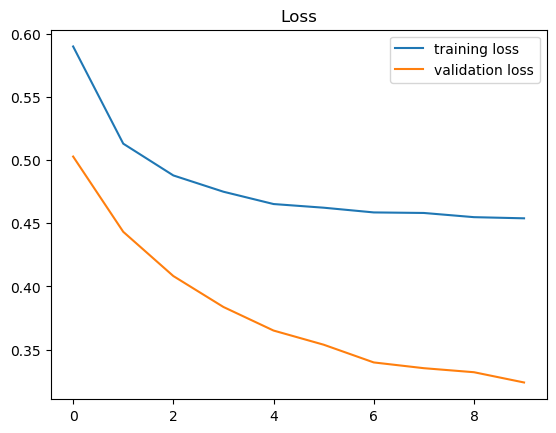

In [131]:
#Loss vizualized to check for overfitting 
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['training loss', 'validation loss']);
plt.title('Loss')


Text(0.5, 1.0, 'Accuracy')

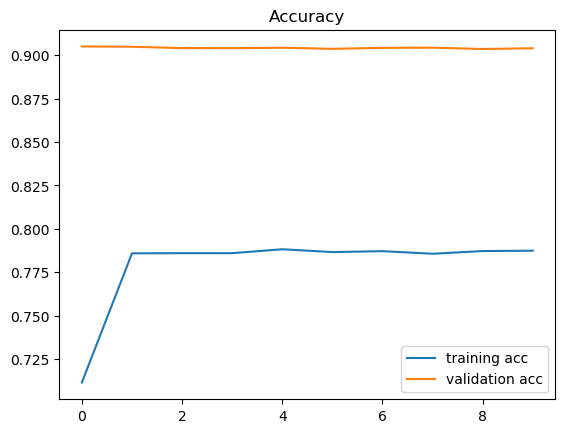

In [132]:
#Accuracy vizualized to check for overfitting 
plt.plot(history.history['acc']);
plt.plot(history.history['val_acc']);
plt.legend(['training acc', 'validation acc']);
plt.title('Accuracy')


In [133]:
# Neural network on Character Level Level TF IDF Vectors
def make_model():
    model = Sequential()
    model.add(Dense(units=100, activation='relu', input_dim=xtrain_tfidf_ngram.shape[1]))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dropout(rate=0.30))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

model = make_model()
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(xtrain_tfidf_ngram_chars, train_y, epochs=10, verbose=2, batch_size=400, validation_data=(xvalid_tfidf_ngram_chars, valid_y))


Train on 226089 samples, validate on 75363 samples
Epoch 1/10
 - 40s - loss: 0.5440 - acc: 0.7816 - val_loss: 0.4463 - val_acc: 0.9913
Epoch 2/10
 - 29s - loss: 0.4533 - acc: 0.8444 - val_loss: 0.3657 - val_acc: 0.9937
Epoch 3/10
 - 29s - loss: 0.4150 - acc: 0.8466 - val_loss: 0.3118 - val_acc: 0.9939
Epoch 4/10
 - 28s - loss: 0.3968 - acc: 0.8448 - val_loss: 0.2740 - val_acc: 0.9937
Epoch 5/10
 - 30s - loss: 0.3822 - acc: 0.8470 - val_loss: 0.2453 - val_acc: 0.9938
Epoch 6/10
 - 29s - loss: 0.3751 - acc: 0.8467 - val_loss: 0.2252 - val_acc: 0.9934
Epoch 7/10
 - 28s - loss: 0.3698 - acc: 0.8469 - val_loss: 0.2090 - val_acc: 0.9930
Epoch 8/10
 - 28s - loss: 0.3669 - acc: 0.8468 - val_loss: 0.1969 - val_acc: 0.9937
Epoch 9/10
 - 31s - loss: 0.3622 - acc: 0.8484 - val_loss: 0.1870 - val_acc: 0.9935
Epoch 10/10
 - 27s - loss: 0.3630 - acc: 0.8467 - val_loss: 0.1798 - val_acc: 0.9937


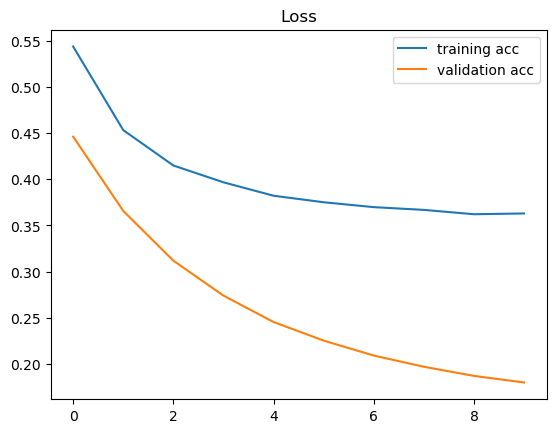

In [134]:
#Accuracy vizualized to check for overfitting 
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['training acc', 'validation acc']);
plt.title('Loss')
color="blue"

Text(0.5, 1.0, 'Accuracy')

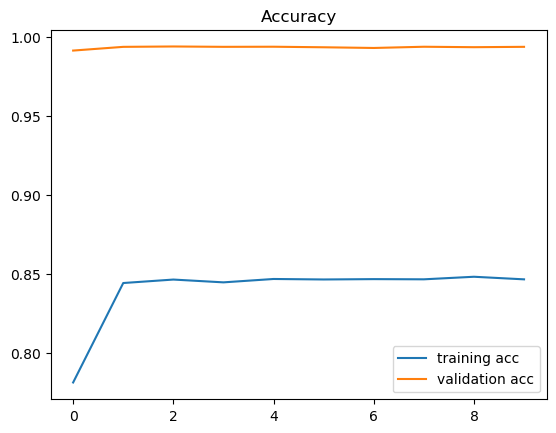

In [135]:
#Loss vizualized to check for overfitting 
plt.plot(history.history['acc']);
plt.plot(history.history['val_acc']);
plt.legend(['training acc', 'validation acc']);
plt.title('Accuracy')